In [1]:
# Step 1: Load dataset into a pandas DataFrame
import pandas as pd

data = {
    'CustomerID': [1,2,3,4,5,6,7,8,9,10],
    'Annual Income': [15,16,17,18,19,20,21,22,23,24],
    'Spending Score': [39,81,6,77,40,76,6,94,3,72]
}
df = pd.DataFrame(data)

print(df)
print("\nSummary statistics:")
print(df.describe())


   CustomerID  Annual Income  Spending Score
0           1             15              39
1           2             16              81
2           3             17               6
3           4             18              77
4           5             19              40
5           6             20              76
6           7             21               6
7           8             22              94
8           9             23               3
9          10             24              72

Summary statistics:
       CustomerID  Annual Income  Spending Score
count    10.00000       10.00000       10.000000
mean      5.50000       19.50000       49.400000
std       3.02765        3.02765       35.094159
min       1.00000       15.00000        3.000000
25%       3.25000       17.25000       14.250000
50%       5.50000       19.50000       56.000000
75%       7.75000       21.75000       76.750000
max      10.00000       24.00000       94.000000


In [2]:
# Step 2: Select features for clustering
# Why: "Annual Income" shows purchasing power; "Spending Score" captures behavior.
X = df[['Annual Income', 'Spending Score']].values

# quick check
print("Feature matrix shape:", X.shape)
print(X[:5])


Feature matrix shape: (10, 2)
[[15 39]
 [16 81]
 [17  6]
 [18 77]
 [19 40]]


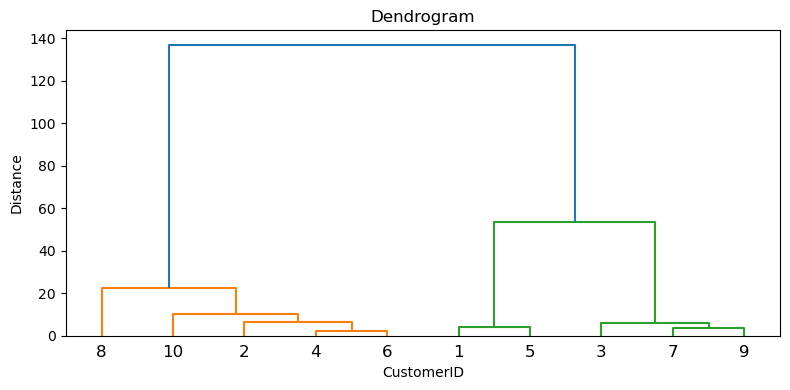

In [3]:
# Step 3: Dendrogram to visualise hierarchical clustering structure
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

Z = sch.linkage(X, method='ward')   # 'ward' tends to produce compact spherical clusters
plt.figure(figsize=(8,4))
sch.dendrogram(Z, labels=df['CustomerID'].values, leaf_rotation=0)
plt.title('Dendrogram')
plt.xlabel('CustomerID')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


In [4]:
# Step 4: Decide number of clusters
# Option A (visual): inspect the dendrogram and cut the longest vertical distance -> choose n_clusters.
# Option B (simple programmatic hint): look for the largest gap in linkage distances.
import numpy as np

# linkage distances are in column 2 of Z
linkage_heights = Z[:, 2]
# reverse and check differences to find a big jump
last = linkage_heights[::-1]
gaps = np.diff(last)
suggested_k = np.argmax(gaps) + 1  # +1 because diff reduces length by 1
print("Linkage heights (reversed):", last)
print("Gaps between successive merges:", gaps)
print("Suggested number of clusters (gap heuristic):", suggested_k)

# For this small example, a common choice from the dendrogram is:
n_clusters = 3
print("Using n_clusters =", n_clusters)


Linkage heights (reversed): [136.86562753  53.6960582   22.36067977  10.39230485   6.244998
   6.02771377   4.12310563   3.60555128   2.23606798]
Gaps between successive merges: [-83.16956933 -31.33537843 -11.96837493  -4.14730685  -0.21728423
  -1.90460815  -0.51755435  -1.3694833 ]
Suggested number of clusters (gap heuristic): 5
Using n_clusters = 3


In [5]:
# Step 5: Agglomerative Clustering using chosen number of clusters
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X)

df['Cluster'] = labels
print(df[['CustomerID', 'Annual Income', 'Spending Score', 'Cluster']])


   CustomerID  Annual Income  Spending Score  Cluster
0           1             15              39        2
1           2             16              81        0
2           3             17               6        1
3           4             18              77        0
4           5             19              40        2
5           6             20              76        0
6           7             21               6        1
7           8             22              94        0
8           9             23               3        1
9          10             24              72        0


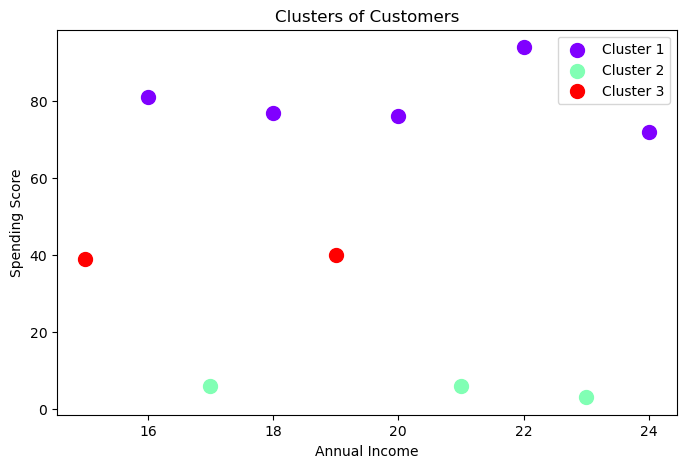

In [8]:
# Step 6: Visualize the final clusters
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Number of clusters chosen earlier
n_clusters = len(set(labels))

plt.figure(figsize=(8,5))
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

# Plot each cluster with a different color
for cluster_id, color in zip(range(n_clusters), colors):
    cluster_points = X[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                s=100, c=[color], label=f'Cluster {cluster_id+1}')

# Add labels and title
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
